In [1]:
from numpy import argmax
from pandas import DataFrame, concat

from data.load import load_train_data, load_test_data
from model.convolutional import build_compile_fit, reshape_input
from reporting.evaluation import plot_confusion_matrix
from reporting.images import display_dataframe
import shap
from numpy.random import choice
import tensorflow as tf

## required for shap
tf.compat.v1.disable_eager_execution()

In [2]:
x_train, y_train = load_train_data()
x_test, y_test = load_test_data()

x_train_reshaped, y_train_reshaped = reshape_input(x_train, y_train)
x_test_reshaped, y_test_reshaped = reshape_input(x_test, y_test)

In [3]:
model, history = build_compile_fit(x_train_reshaped, y_train_reshaped, epochs=5)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 13s 211us/sample - loss: 8.6580 - accuracy: 0.4604

In [4]:
compare_items = 100
prediction = [argmax(x) for x in model.predict(x_test_reshaped[:compare_items])]
expectation = y_test_reshaped[:compare_items]
comparison = concat([DataFrame(prediction, columns=['prediction']), expectation.rename('actual')], axis=1)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


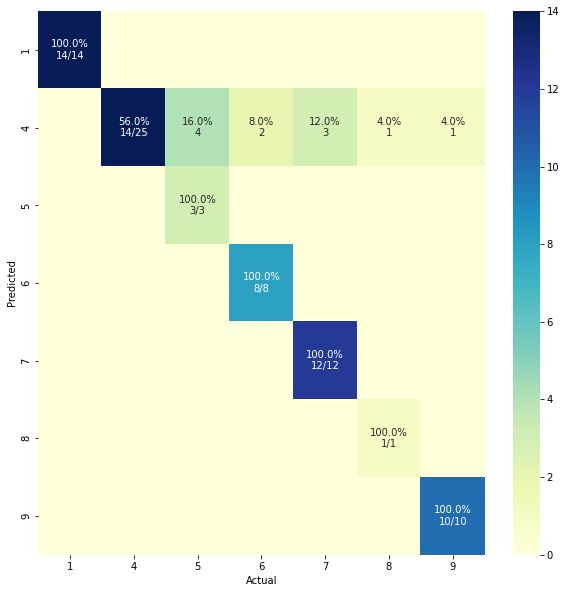

In [5]:
plot_confusion_matrix(prediction, expectation)

# Mismatches

The following items did not match the expectation.

In [6]:
missmatch = comparison[comparison.prediction != comparison.actual]
missmatch

,prediction,actual
1,6,2
3,6,0
8,4,5
10,8,0
13,8,0
18,4,3
22,4,6
23,4,5
25,6,0
28,8,0


Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


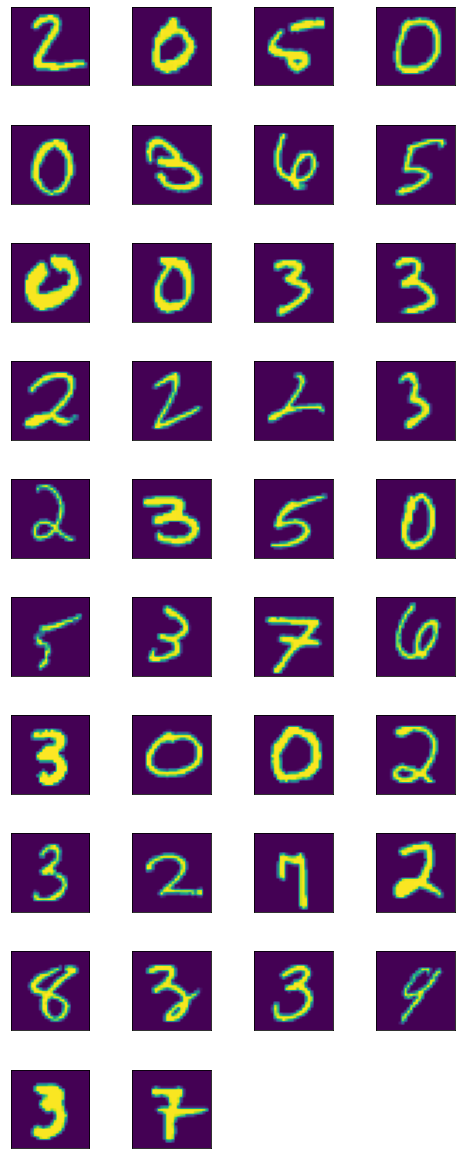

In [7]:
display_dataframe(x_test.iloc[missmatch.index])

In [8]:
print("SHAP version is:", shap.__version__)
print("Tensorflow version is:", tf.__version__)
print("")

SHAP version is: 0.40.0
Tensorflow version is: 2.6.2



In [55]:
elements = 5
background = x_test_reshaped[choice(x_test_reshaped.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(x_test_reshaped[1:elements])

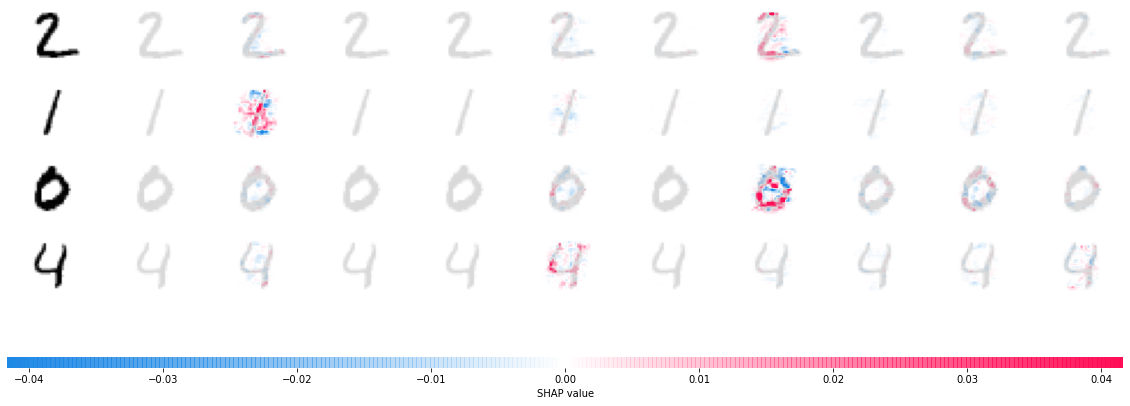

In [56]:
shap.image_plot(shap_values, -x_test_reshaped[1:elements])

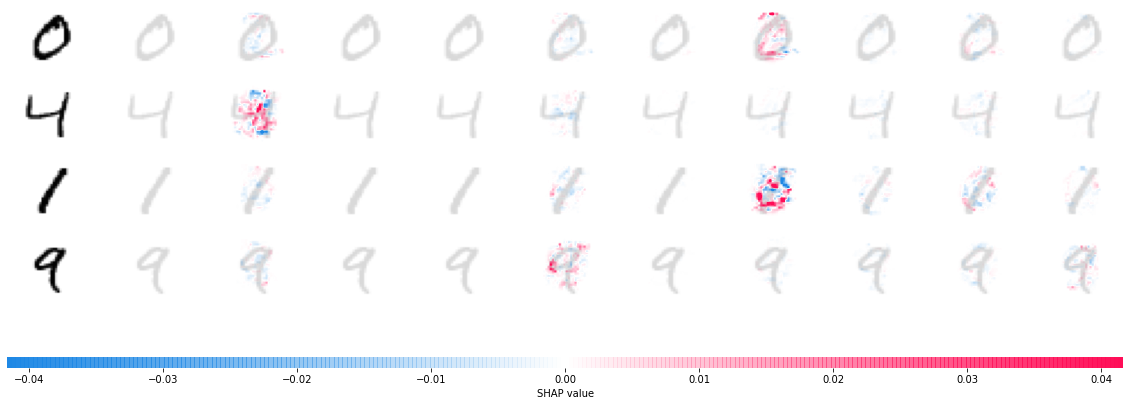

In [57]:
shap.image_plot(shap_values, -x_train_reshaped[1:elements])
